# Linear Regression with Scikit-Learn and Statsmodels

<img src="https://avatars2.githubusercontent.com/u/365630?v=3&s=400" style="width: 300px; float: left; margin: 20px; margin-top: -20px; break: right;"><img src="https://snag.gy/qfaubJ.jpg" style="width: 300px; float: left; margin: 20px;"> 

<br clear="all">
Let's investigate the housing dataset with linear regression. We'll use two different packages and you can see examples for linear regression of each:
* statsmodels -- [linear regression](http://statsmodels.sourceforge.net/devel/examples/#regression)
* scikit-learn -- [linear regression](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html)

## Background: Scikit-learn / sklearn

<img src="https://avatars1.githubusercontent.com/u/25111?v=3&s=200" style="float: left; margin: 0 25px;"> Scikit-learn was founded in 2007 as a Google summer of code project by [David Cournapeau](https://github.com/cournape).  Later in 2007, Matthieu Brucher published his thesis on Scikit-learn.  Since then, the Scikit-learn project has taken on a team of owners, of which are based worldwide. A great high level overview can be found in a 2011 publication in [Journal of Machine Learning Research 12 (2011) 2825-2830](http://www.jmlr.org/papers/volume12/pedregosa11a/pedregosa11a.pdf).

Skikit-learn is part of the Scipy family of "kits".  Explore some of the [other projects](https://scikits.appspot.com/scikits) in this family.
<br clear="all"><br>
Scikit-learn provides a wide variety of machine learning opportunities including:

- Linear regression
- Logistic regression
- Support Vector Machines
- Classification And Regression Tree Models
- Naive Bayes
- Clustering Models (K-Means, Hierarchical, DBScan)

Also handling typical machine learning pipeline utilities for:
- Model evaluation
- Model selection
- Preprocessing
- Natural Language Processing
- Dimensionality Reduction

Lastly, Scikit-learn comes with a ton of datasets that are formatted nicely to work with models provided within their library.
- Boston Housing
- Iris Flowers
- Diabetes Diagnostics
- Various sample images (for classification)
  - Faces
  - MINIST (handwriting examples)
- Random data generators
- Spam examples
- Newsgroup classfication

[Read more about Scikit-learn datasets](http://scikit-learn.org/stable/datasets/)

### Under the Hood

- **Numpy**:  The base data structure used for data and model parameters. Input data is presented as numpy arrays, thus integrating seamlessly with other scientific Python libraries. Numpy’s viewbased memory model limits copies, even when binding with compiled code.  It also provides basic arithmetic operations.<br><br>

- **Scipy**:  Efficient algorithms for linear algebra, sparse matrix representation, special functions and basic statistical functions.<br><br>

- **Cython**:  A language for combining C in Python. Cython makes it easy to reach the performance of compiled languages with Python-like syntax and high-level operations.

## First Steps:  Scikit-learn

Scikit-learn is a machine learning package for python that includes a huge array of models including linear regression. Scikit-learn includes a number of sample data sets including the Boston housing data set. 

_You could also load the datasets with Pandas from the prior lessons and try all of this out.  **Highly recommended!**_

In [17]:
from matplotlib import pyplot as plt

pd.set_option('display.mpl_style', 'default') # Make the graphs a bit prettier

from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error

data = datasets.load_boston()

print data.DESCR # This is like a data dictionary!

# Don't forget to turn on plotting display in the notebook
%matplotlib inline 

Boston House Prices dataset

Notes
------
Data Set Characteristics:  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive
    
    :Median Value (attribute 14) is usually the target

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pupil-teacher ratio by town
      

Let's take a minute to see what the data looks like.

In [4]:
print data.feature_names
print data.data[0:3]
print data.target[0] #In this case the median value is usually the target

['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']
[[  6.32000000e-03   1.80000000e+01   2.31000000e+00   0.00000000e+00
    5.38000000e-01   6.57500000e+00   6.52000000e+01   4.09000000e+00
    1.00000000e+00   2.96000000e+02   1.53000000e+01   3.96900000e+02
    4.98000000e+00]
 [  2.73100000e-02   0.00000000e+00   7.07000000e+00   0.00000000e+00
    4.69000000e-01   6.42100000e+00   7.89000000e+01   4.96710000e+00
    2.00000000e+00   2.42000000e+02   1.78000000e+01   3.96900000e+02
    9.14000000e+00]
 [  2.72900000e-02   0.00000000e+00   7.07000000e+00   0.00000000e+00
    4.69000000e-01   7.18500000e+00   6.11000000e+01   4.96710000e+00
    2.00000000e+00   2.42000000e+02   1.78000000e+01   3.92830000e+02
    4.03000000e+00]]
24.0


### Pandas for Convenience

Our target is what we are predicting.  Also known as our **response variable**.

The data we train on is what we **fit**, to our model.  The variables we use within our training data are also known as our **predictor variables**.

Scikit-learn has already split our data into **predictors** (within training data), and **response** (target). Let's see how to build a linear regression. First let's put the data into a data frame for convenience, and do a quick check to see that everything loaded correctly.

In [5]:
import numpy as np
import pandas as pd

df = pd.DataFrame(data.data, columns=data.feature_names)

# Put the target (housing value -- MEDV) in another DataFrame
targets = pd.DataFrame(data.target, columns=["MEDV"])

# Take a look at the first few rows
print df.shape
df.head()

(506, 13)


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


Our training set is a matrix / dataframe with many variables (**CRI, ZN, INDUS, CHAS, NOX, RM, AGE, DIS, RAD, TAX, PTRATIO, B,** and **LSTAT**), containing **13** variables within **506** rows.

Our target is a series (in Pandas), that represents a single variable (**MEDV**), which is exactly the same length as our training set, **506**.

> _Training (fit) and target datasets must always match in length!_

In [6]:
print targets.shape
targets.head()

(506, 1)


,MEDV
0,24.0
1,21.6
2,34.7
3,33.4
4,36.2


### Each Index Corresponds

For example:

Row 0 of **df** (our training set):
#### [0.00632	18.0	2.31	0.0	0.538	6.575	65.2	4.0900	1.0	296.0	15.3	396.90	4.98]

Cooresponds to the true value of our target, Row 0 **targets**:
#### 24.0

---
Row 3 of **df** (our training set):
#### [0.03237	0.0	2.18	0.0	0.458	6.998	45.8	6.0622	3.0	222.0	18.7	394.63	2.94]

Cooresponds to the true value of our target, Row 3 **targets**:
#### 33.4
---

These two seperate datasets (a matrix/dataframe, and a vector/series), are used to `.fit(training, response)`.  The training data is `n_samples x n_features`.  The response is a `single series x n_samples` matching the `n_samples` of the training data.

# Fitting our 1st Model!

Now let's fit a linear model to the data. First let's take a look at some of the variables we identified visually as being linked to house value, RM (we'll look at LSTAT later). Let's look at each individually and then both together.

_Note: If for some reason scikit-learn crashes the jupyter notebook, have conda remove mkl (there's an issue with the newer build on some systems)._

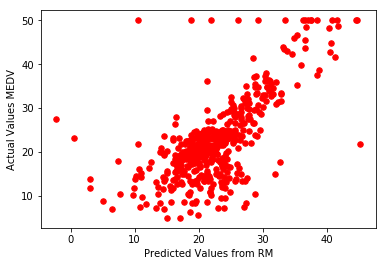

In [15]:
lm = linear_model.LinearRegression() #Calling linear regression object.

X = df[["RM"]]
y = targets["MEDV"]

model        =  lm.fit(X, y) #This is where the optimization problem is being solved. 
#Fit linear model x - training data, y - target values.
predictions  =  model.predict(X) #prints the predicted values of Y with the values of X.
score        =  model.score(X, y) # Prints the mean square error (MSE), it trains on RSS. RSS/ n


# Plot the model
## s = s: size in points, c = color, zorder = layer order
plt.scatter(predictions, y, s=30, c='r', zorder=10)
plt.xlabel("Predicted Values from RM")
plt.ylabel("Actual Values MEDV")
plt.show()

**Check**: How does this plot relate to the model? In other words, how are the independent variables (RM, and LSTAT) and dependent variable ("MEDV") incorporated?

### R2, RMSE, Coeffients, and Predictions

After you run `.fit()` and `.predict()`, the parent scikit-learn object that handles your model, and the object returned from `.fit()`, contain important metrics.  

Incuding:

- **.coef_**: Class property containing the coeffients matching the training variables (predictors)
- **.score(X (matrix), y (target))**: Class method / function that returns the coefficient of determination R^2 of the prediction.  Found in many models in scikit-learn (but not all).


In [9]:
print "MSE: \n%f \n" % mean_squared_error(y, predictions)

# Alternatively, you can calulate MSE this way 
print "Residual sum of squares: \n%.2f \n" % (np.mean((predictions - y) ** 2))

print "Coefficients ('RM'): \n%s \n" % model.coef_

# R^2 (predictions vs actual target) - normalized measure of variance
# Can be negative, typically between 0 and 1.  Cam be negative depending on predictions way out outside the range of your target / training.
# Sum of squares / residual sum of squares
# Or 1 - variance(residuals) / variance(y)
print "R^2 / Variance Explained Score (1 = perfect score): \n%f \n" % score

MSE: 
43.600552 

Residual sum of squares: 
43.60 

Coefficients ('RM'): 
[ 9.10210898] 

R^2 / Variance Explained Score (1 = perfect score): 
0.483525 



### Another Look at Prediction

At times, it's nice to have a consolidated dataframe containing your original dataset, target variable, and predicted response all in one place.

In [12]:
compared = X
compared.loc[:, 'Predicted MEDV (y_hat)'] = predictions
compared.loc[:, 'Actual MED (y)'] = y

compared.head(5)

,LSTAT,Predicted MEDV (y_hat),Actual MED (y)
0,4.98,29.822595,24.0
1,9.14,25.870390,21.6
2,4.03,30.725142,34.7
3,2.94,31.760696,33.4
4,5.33,29.490078,36.2


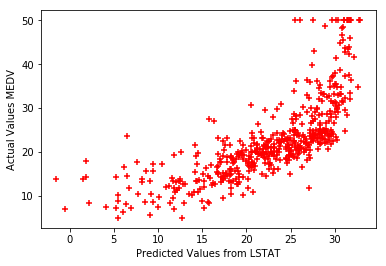

MSE: 
38.482967 

Coefficients ('RM'): 
[-0.95004935] 

R^2 / Variance Explained Score (1 = perfect score): 
0.483525 



In [13]:
# Here's the same pipeline, using a single variable LSTAT

lm = linear_model.LinearRegression()

X = df[["LSTAT"]] 
y = targets["MEDV"]

model = lm.fit(X, y)
predictions = lm.predict(X)

# Plot the model
plt.scatter(predictions, y, s=30, c='r', marker='+', zorder=10)
plt.xlabel("Predicted Values from LSTAT")
plt.ylabel("Actual Values MEDV")
plt.show()

print "MSE: \n%f \n" % mean_squared_error(y, predictions)
print "Coefficients ('RM'): \n%s \n" % model.coef_

# R^2 (predictions vs actual target) - normalized measure of variance
# Can be negative, typically between 0 and 1.  Cam be negative depending on predictions way out outside the range of your target / training.
# Sum of squares / residual sum of squares
# Or 1 - variance(residuals) / variance(y)
print "R^2 / Variance Explained Score (1 = perfect score): \n%f \n" % score

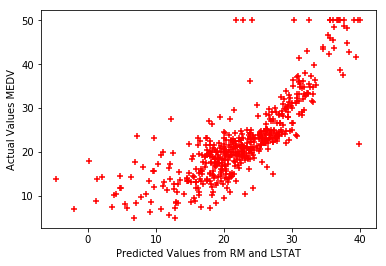

MSE: 30.5124687773


In [24]:
lm = linear_model.LinearRegression()

X = df[["RM", "LSTAT"]] #passing two x values in for multiple linear regression.
y = targets["MEDV"]

model = lm.fit(X, y)
predictions = model.predict(X)

# Plot the model
plt.scatter(predictions, y, s=30, c='r', marker='+', zorder=10)
plt.xlabel("Predicted Values from RM and LSTAT")
plt.ylabel("Actual Values MEDV")
plt.show()
print "MSE:", mean_squared_error(y, predictions)

## Comparing the models

A perfect fit would yield a straight line when we plot the predicted values versus the true values. We'll quantify the goodness of fit soon.

### Exercise

Run the fit on all the variables with `X = df`. Did this improve the fit versus the previously tested variable combinations? (Use mean squared error).

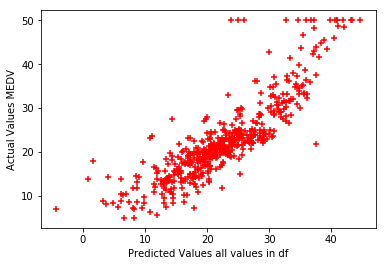

MSE: 21.8977792177
MSE: 
21.897779 

Coefficients ('RM'): 
[ -1.07170557e-01   4.63952195e-02   2.08602395e-02   2.68856140e+00
  -1.77957587e+01   3.80475246e+00   7.51061703e-04  -1.47575880e+00
   3.05655038e-01  -1.23293463e-02  -9.53463555e-01   9.39251272e-03
  -5.25466633e-01] 

R^2 / Variance Explained Score (1 = perfect score): 
0.740608 



In [29]:
lm = linear_model.LinearRegression()

X = df #passing two x values in for multiple linear regression.
y = targets["MEDV"]

model = lm.fit(X, y)
predictions = model.predict(X)
score        =  model.score(X, y)

# Plot the model
plt.scatter(predictions, y, s=30, c='r', marker='+', zorder=10)
plt.xlabel("Predicted Values all values in df")
plt.ylabel("Actual Values MEDV")
plt.show()
print "MSE:", mean_squared_error(y, predictions)

print "MSE: \n%f \n" % mean_squared_error(y, predictions)
print "Coefficients ('RM'): \n%s \n" % model.coef_

# R^2 (predictions vs actual target) - normalized measure of variance
# Can be negative, typically between 0 and 1.  Cam be negative depending on predictions way out outside the range of your target / training.
# Sum of squares / residual sum of squares
# Or 1 - variance(residuals) / variance(y)
print "R^2 / Variance Explained Score (1 = perfect score): \n%f \n" % score

## Intro to Statsmodels

Now let's see how to use another popular package for regressions.

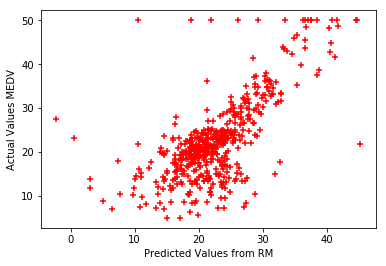

MSE: 43.6005517712


In [37]:
import statsmodels.api as sm

X = df["RM"]
X = sm.add_constant(X, prepend=False)
y = targets["MEDV"]

# Note the difference in argument order
model = sm.OLS(y, X).fit()
predictions = model.predict(X)

# Plot the model
plt.scatter(predictions, y, s=30, c='r', marker='+', zorder=10)
plt.xlabel("Predicted Values from RM")
plt.ylabel("Actual Values MEDV")
plt.show()

print "MSE:", mean_squared_error(y, predictions)

In [38]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.484
Model:                            OLS   Adj. R-squared:                  0.483
Method:                 Least Squares   F-statistic:                     471.8
Date:                Mon, 20 Mar 2017   Prob (F-statistic):           2.49e-74
Time:                        14:59:39   Log-Likelihood:                -1673.1
No. Observations:                 506   AIC:                             3350.
Df Residuals:                     504   BIC:                             3359.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
RM             9.1021      0.419     21.722      0.000         8.279     9.925
const        -34.6706      2.650    -13.084      0.000       -39.877   -29.465
==============================================================================
Omnibus:                      102.585   Durbin-Watson:                   0.684
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              612.449
Skew:                           0.726   Prob(JB):                    1.02e-133
Kurtosis:                       8.190   Cond. No.                         58.4
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

_The more variables that are added, the chance that one of the variables coorelates more with a given response.  Adj-R^2, controls / noramlizes your R^2 based on the number of samples._

## Guided Practice

Compare this to the analgous fit from scikit-learn above.

### Exercises

Recreate the model fits above with `statsmodels`:
* a model using LSTAT
* a model using RM and LSTAT
* a model using all the variables

Compare the mean squared errors for each model between the two packages. Do they differ significantly? Why or why not?

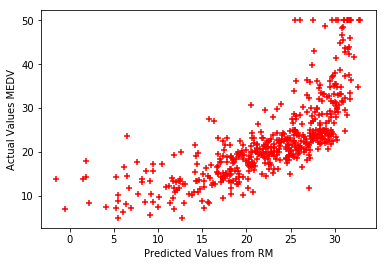

MSE: 38.4829672299


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.544
Model:                            OLS   Adj. R-squared:                  0.543
Method:                 Least Squares   F-statistic:                     601.6
Date:                Mon, 20 Mar 2017   Prob (F-statistic):           5.08e-88
Time:                        15:17:04   Log-Likelihood:                -1641.5
No. Observations:                 506   AIC:                             3287.
Df Residuals:                     504   BIC:                             3295.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
LSTAT         -0.9500      0.039    -24.528      0.000        -1.026    -0.874
const         34.5538      0.563     61.415      0.000        33.448    35.659
==============================================================================
Omnibus:                      137.043   Durbin-Watson:                   0.892
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              291.373
Skew:                           1.453   Prob(JB):                     5.36e-64
Kurtosis:                       5.319   Cond. No.                         29.7
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [43]:
# Start your exercises here
import statsmodels.api as sm

X = df["LSTAT"]
X = sm.add_constant(X, prepend=False)
y = targets["MEDV"]

# Note the difference in argument order
model = sm.OLS(y, X).fit()
predictions = model.predict(X)

# Plot the model
plt.scatter(predictions, y, s=30, c='r', marker='+', zorder=10)
plt.xlabel("Predicted Values from RM")
plt.ylabel("Actual Values MEDV")
plt.show()

print "MSE:", mean_squared_error(y, predictions)
model.summary()

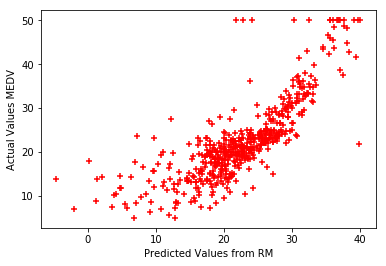

MSE: 30.5124687773


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.639
Model:                            OLS   Adj. R-squared:                  0.637
Method:                 Least Squares   F-statistic:                     444.3
Date:                Mon, 20 Mar 2017   Prob (F-statistic):          7.01e-112
Time:                        15:17:40   Log-Likelihood:                -1582.8
No. Observations:                 506   AIC:                             3172.
Df Residuals:                     503   BIC:                             3184.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
LSTAT         -0.6424      0.044    -14.689      0.000        -0.728    -0.556
RM             5.0948      0.444     11.463      0.000         4.222     5.968
const         -1.3583      3.173     -0.428      0.669        -7.592     4.875
==============================================================================
Omnibus:                      145.712   Durbin-Watson:                   0.834
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              457.690
Skew:                           1.343   Prob(JB):                    4.11e-100
Kurtosis:                       6.807   Cond. No.                         202.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [44]:
# Start your exercises here
import statsmodels.api as sm

X = df[["LSTAT","RM"]]
X = sm.add_constant(X, prepend=False)
y = targets["MEDV"]

# Note the difference in argument order
model = sm.OLS(y, X).fit()
predictions = model.predict(X)

# Plot the model
plt.scatter(predictions, y, s=30, c='r', marker='+', zorder=10)
plt.xlabel("Predicted Values from RM")
plt.ylabel("Actual Values MEDV")
plt.show()

print "MSE:", mean_squared_error(y, predictions)
model.summary()

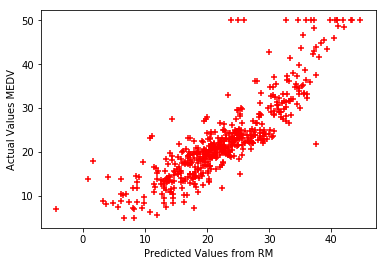

MSE: 21.8977792177


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.741
Model:                            OLS   Adj. R-squared:                  0.734
Method:                 Least Squares   F-statistic:                     108.1
Date:                Mon, 20 Mar 2017   Prob (F-statistic):          6.95e-135
Time:                        15:18:01   Log-Likelihood:                -1498.8
No. Observations:                 506   AIC:                             3026.
Df Residuals:                     492   BIC:                             3085.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
CRIM          -0.1072      0.033     -3.276      0.001        -0.171    -0.043
ZN             0.0464      0.014      3.380      0.001         0.019     0.073
INDUS          0.0209      0.061      0.339      0.735        -0.100     0.142
CHAS           2.6886      0.862      3.120      0.002         0.996     4.381
NOX          -17.7958      3.821     -4.658      0.000       -25.302   -10.289
RM             3.8048      0.418      9.102      0.000         2.983     4.626
AGE            0.0008      0.013      0.057      0.955        -0.025     0.027
DIS           -1.4758      0.199     -7.398      0.000        -1.868    -1.084
RAD            0.3057      0.066      4.608      0.000         0.175     0.436
TAX           -0.0123      0.004     -3.278      0.001        -0.020    -0.005
PTRATIO       -0.9535      0.131     -7.287      0.000        -1.211    -0.696
B              0.0094      0.003      3.500      0.001         0.004     0.015
LSTAT         -0.5255      0.051    -10.366      0.000        -0.625    -0.426
const         36.4911      5.104      7.149      0.000        26.462    46.520
==============================================================================
Omnibus:                      178.029   Durbin-Watson:                   1.078
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              782.015
Skew:                           1.521   Prob(JB):                    1.54e-170
Kurtosis:                       8.276   Cond. No.                     1.51e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.51e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [45]:
# Start your exercises here
import statsmodels.api as sm

X = df
X = sm.add_constant(X, prepend=False)
y = targets["MEDV"]

# Note the difference in argument order
model = sm.OLS(y, X).fit()
predictions = model.predict(X)

# Plot the model
plt.scatter(predictions, y, s=30, c='r', marker='+', zorder=10)
plt.xlabel("Predicted Values from RM")
plt.ylabel("Actual Values MEDV")
plt.show()

print "MSE:", mean_squared_error(y, predictions)
model.summary()

## Independent Practice

Using our preference of `scikit-learn` or `statsmodels`, try to find the best models that you can that:
* use only two variables
* only three variables
* only four variables

Evaluate your models using the squared error. Which has the lowest? How do the errors compare to using all the variables?

:Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pupil-teacher ratio by town
        - B        1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
        - LSTAT    % lower status of the population
        - MEDV     Median value of owner-occupied homes in $1000's

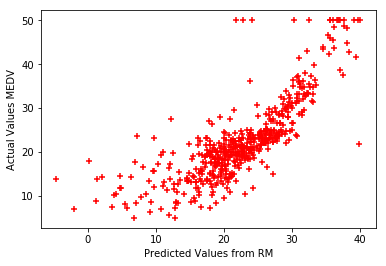

MSE: 30.5124687773


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.639
Model:                            OLS   Adj. R-squared:                  0.637
Method:                 Least Squares   F-statistic:                     444.3
Date:                Mon, 20 Mar 2017   Prob (F-statistic):          7.01e-112
Time:                        15:46:56   Log-Likelihood:                -1582.8
No. Observations:                 506   AIC:                             3172.
Df Residuals:                     503   BIC:                             3184.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
LSTAT         -0.6424      0.044    -14.689      0.000        -0.728    -0.556
RM             5.0948      0.444     11.463      0.000         4.222     5.968
const         -1.3583      3.173     -0.428      0.669        -7.592     4.875
==============================================================================
Omnibus:                      145.712   Durbin-Watson:                   0.834
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              457.690
Skew:                           1.343   Prob(JB):                    4.11e-100
Kurtosis:                       6.807   Cond. No.                         202.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [94]:
# Start your exercises here
import statsmodels.api as sm

X = df[["LSTAT","RM"]]
X = sm.add_constant(X, prepend=False)
y = targets["MEDV"]

# Note the difference in argument order
model = sm.OLS(y, X).fit()
predictions = model.predict(X)

# Plot the model
plt.scatter(predictions, y, s=30, c='r', marker='+', zorder=10)
plt.xlabel("Predicted Values from RM")
plt.ylabel("Actual Values MEDV")
plt.show()

print "MSE:", mean_squared_error(y, predictions)
model.summary()

# Bonus Exercises

From the LSTAT plot you may have noticed that the relationship is not quite linear. Add a new column `"LSTAT2"` to your data frame for the LSTAT values squared and try to fit a quadratic function using `["LSTAT", "LSTAT2"]`. Is the resulting fit better or worse?

In [49]:
df["LSTAT2"] = df["LSTAT"]**2

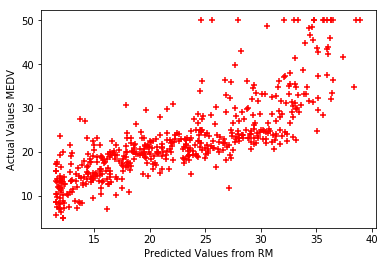

MSE: 30.3305200759


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.641
Model:                            OLS   Adj. R-squared:                  0.639
Method:                 Least Squares   F-statistic:                     448.5
Date:                Mon, 20 Mar 2017   Prob (F-statistic):          1.56e-112
Time:                        15:27:09   Log-Likelihood:                -1581.3
No. Observations:                 506   AIC:                             3169.
Df Residuals:                     503   BIC:                             3181.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
LSTAT         -2.3328      0.124    -18.843      0.000        -2.576    -2.090
LSTAT2         0.0435      0.004     11.628      0.000         0.036     0.051
const         42.8620      0.872     49.149      0.000        41.149    44.575
==============================================================================
Omnibus:                      107.006   Durbin-Watson:                   0.921
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              228.388
Skew:                           1.128   Prob(JB):                     2.55e-50
Kurtosis:                       5.397   Cond. No.                     1.13e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.13e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [50]:
# Start your exercises here
import statsmodels.api as sm

X = df[["LSTAT","LSTAT2"]]
X = sm.add_constant(X, prepend=False)
y = targets["MEDV"]

# Note the difference in argument order
model = sm.OLS(y, X).fit()
predictions = model.predict(X)

# Plot the model
plt.scatter(predictions, y, s=30, c='r', marker='+', zorder=10)
plt.xlabel("Predicted Values from RM")
plt.ylabel("Actual Values MEDV")
plt.show()

print "MSE:", mean_squared_error(y, predictions)
model.summary()

### Using Formulas /w Statsmodels

We will walk through this after practice.  (ie: formula='Lottery ~ Literacy + Wealth + Region', data=df)